In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
avocado = pd.read_csv("avocado.csv")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [4]:
avocado.drop(["Unnamed: 0"], axis =1, inplace = True)
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [7]:
avocado.drop(["type"], axis =1, inplace = True)
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico


<AxesSubplot:xlabel='Distribution of average price', ylabel='Density'>

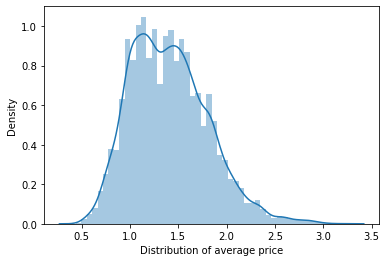

In [8]:
sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")

In [9]:
l = LabelEncoder()
avocado['region'] = l.fit_transform(avocado['region'])
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


<AxesSubplot:>

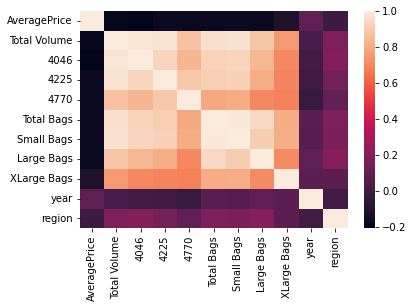

In [10]:
sns.heatmap(avocado.corr())

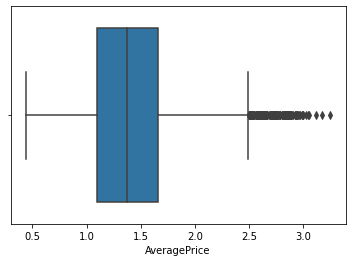

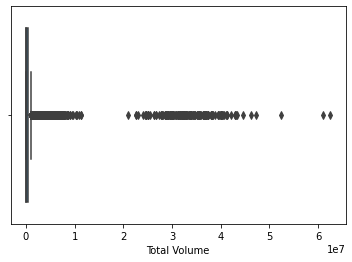

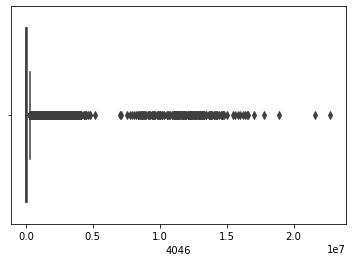

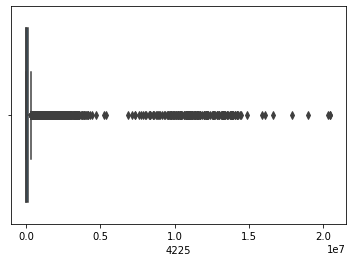

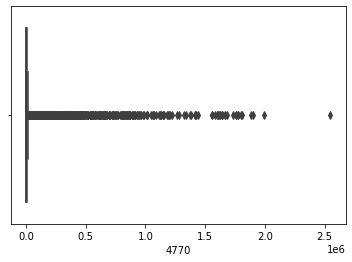

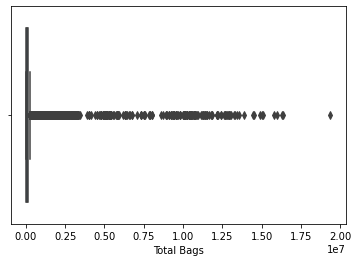

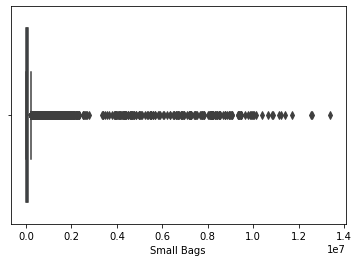

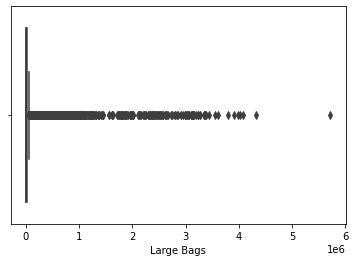

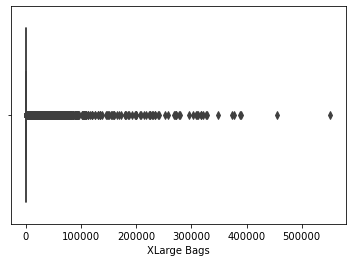

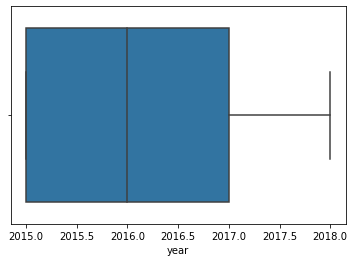

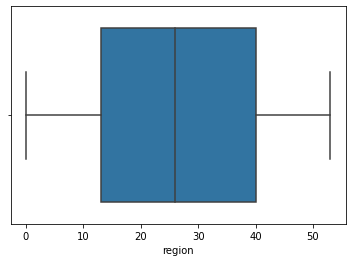

In [11]:
for i in avocado.describe().columns:
    sns.boxplot(avocado[i].dropna())
    plt.show()

In [12]:
#encoding dates to numerics
l = LabelEncoder()
avocado['Date'] = l.fit_transform(avocado['Date'])
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


In [13]:
from scipy import stats
avocado = avocado[(np.abs(stats.zscore(avocado)) < 3).all(axis=1)]
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


In [14]:
from sklearn.preprocessing import StandardScaler
Y = avocado["AveragePrice"]
X = avocado.drop('AveragePrice', axis = 1)

In [15]:
Y = Y.values.reshape(-1,1)
Y.shape

(17651, 1)

In [16]:
#Making the columns in similar range
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X


,0,1,2,3,4,5,6,7,8,9,10
0,-0.664946,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013,-1.695495
1,-0.685424,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.210013,-1.695495
2,-0.705902,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.210013,-1.695495
3,-0.726380,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.210013,-1.695495
4,-0.746858,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.210013,-1.695495
...,...,...,...,...,...,...,...,...,...,...,...
17646,1.587626,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,1.980756,1.747054
17647,1.567148,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,1.980756,1.747054
17648,1.546670,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,1.980756,1.747054
17649,1.526192,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,1.980756,1.747054


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 120)
print(Y_train.shape, Y_test.shape)

(14120, 1) (3531, 1)


In [18]:
lnr = LinearRegression()
lnr.fit(X_train, Y_train)

LinearRegression()

In [19]:
lnr_pred = lnr.predict(X_test)
lnr_pred

array([[1.47355834],
       [1.56076133],
       [1.43901953],
       ...,
       [1.30924579],
       [1.4386817 ],
       [1.53066475]])

In [20]:
lnr_accuracy = round(lnr.score(X_train, Y_train)*100)
lnr_accuracy

17

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
print('Mean absolute error:', mean_absolute_error(Y_test, lnr_pred))
print('Mean squared error:', mean_squared_error(Y_test, lnr_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, lnr_pred)))
print('R2 score is:', r2_score(Y_test, lnr_pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_pred

In [ ]:
tree_accuracy = round(tree.score(X_train, Y_train)*100)
tree_accuracy

In [ ]:

print('Mean absolute error:', mean_absolute_error(Y_test, tree_pred))
print('Mean squared error:', mean_squared_error(Y_test, tree_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, tree_pred)))
print('R2 score is:', r2_score(Y_test, tree_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 400, max_depth = 6, min_samples_leaf = 100, n_jobs = 4)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_pred

In [ ]:
rf_accuracy = round(rf.score(X_train, Y_train)*100)
rf_accuracy

In [ ]:
print('Mean absolute error:', mean_absolute_error(Y_test, rf_pred))
print('Mean squared error:', mean_squared_error(Y_test, rf_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, rf_pred)))
print('R2 score is:', r2_score(Y_test, rf_pred))

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xg.fit(X_train, Y_train)
xg_pred = xg.predict(X_test)
xg_pred

In [ ]:
xg_accuracy = round(xg.score(X_train, Y_train)*100)
xg_accuracy

In [ ]:
print('Mean absolute error:', mean_absolute_error(Y_test, xg_pred))
print('Mean squared error:', mean_squared_error(Y_test, xg_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, xg_pred)))
print('R2 score is:', r2_score(Y_test, xg_pred))

In [ ]:
import pickle
filename = 'avocado_Price.pkl'
pickle.dump(xg, open(filename, 'wb'))

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


In [22]:
Y = avocado["region"]
X = avocado.drop('region', axis = 1)

In [23]:
Y.shape

(17651,)

In [24]:
Y = Y.values.reshape(-1,1)
Y.shape

(17651, 1)

In [29]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X


,0,1,2,3,4,5,6,7,8,9,10
0,-0.664946,-0.195352,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013
1,-0.685424,-0.143510,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.210013
2,-0.705902,-1.232207,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.210013
3,-0.726380,-0.843387,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.210013
4,-0.746858,-0.324959,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
17646,1.587626,0.582289,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,1.980756
17647,1.567148,0.789660,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,1.980756
17648,1.546670,1.204402,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,1.980756
17649,1.526192,1.359930,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,1.980756
